<a href="https://colab.research.google.com/github/jonnythebard/tf2_workbook/blob/master/ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install Tensorflow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # y = cos(2x1) + cos(3x2)

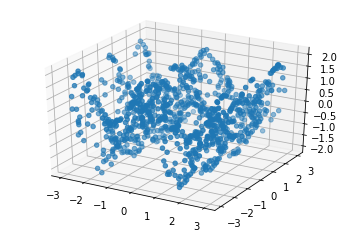

In [0]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

In [0]:
# build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation="relu"),
  tf.keras.layers.Dense(1)
])

In [0]:
# compile and train
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss="mse")
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 132us/sample - loss: 0.9943
Epoch 2/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.9403
Epoch 3/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.9067
Epoch 4/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.8769
Epoch 5/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.8330
Epoch 6/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7572
Epoch 7/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.7104
Epoch 8/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7393
Epoch 9/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.6901
Epoch 10/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.5955
Epoch 11/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.5477
Epoch 12/100
1000/

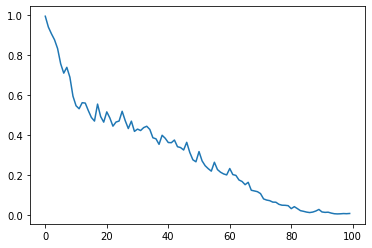

In [0]:
# plot the loss
plt.plot(r.history["loss"], label="loss")

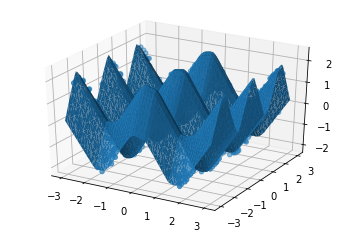

In [0]:
# plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)